In [ ]:
pip install awswrangler

In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [1]:
from __future__ import print_function
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import boto3
import awswrangler as wr
import pandas as pd
import glob
import sagemaker
from sagemaker.image_uris import retrieve
from time import gmtime, strftime
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os

In [2]:
BUCKET_RAW = "ml-dataset-raw-s3"
BUCKET_PREFIX = 'sagemaker'
execution_role = sagemaker.get_execution_role()
region = boto3.Session().region_name
bucket = 'BUCKET_RAW' # <-- use your own bucket, here
prefix = 'sagemaker/randomcutforest'

BUCKET_PREFIX2009 = "raw-out/2009.csv"

pathfull2009 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2009}"
with open(file='from_s3/2009.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2009, local_file=local_f)

BUCKET_PREFIX2010 = "raw-out/2010.csv"

pathfull2010 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2010}"
with open(file='from_s3/2010.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2010, local_file=local_f)

BUCKET_PREFIX2011 = "raw-out/2011.csv"

pathfull2011 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2011}"
with open(file='from_s3/2011.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2011, local_file=local_f)

BUCKET_PREFIX2012 = "raw-out/2012.csv"

pathfull2012 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2012}"
with open(file='from_s3/2012.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2012, local_file=local_f)

BUCKET_PREFIX2013 = "raw-out/2013.csv"

pathfull2013 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2013}"
with open(file='from_s3/2013.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2013, local_file=local_f)

BUCKET_PREFIX2014 = "raw-out/2014.csv"

pathfull2014 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2014}"
with open(file='from_s3/2014.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2014, local_file=local_f)

BUCKET_PREFIX2015 = "raw-out/2015.csv"

pathfull2015 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2015}"
with open(file='from_s3/2015.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2015, local_file=local_f)

BUCKET_PREFIX2016 = "raw-out/2016.csv"

pathfull2016 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2016}"
with open(file='from_s3/2016.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2016, local_file=local_f)

BUCKET_PREFIX2017 = "raw-out/2017.csv"

pathfull2017 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2017}"
with open(file='from_s3/2017.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2017, local_file=local_f)

BUCKET_PREFIX2018 = "raw-out/2018.csv"

pathfull2018 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2018}"
with open(file='from_s3/2018.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2018, local_file=local_f)

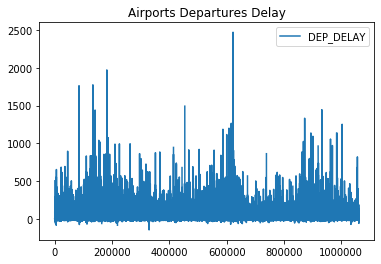

In [3]:
path = r'./from_s3' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

airport_data = pd.concat(li, axis=0, ignore_index=True)

airport_data.plot(title='Airports Departures Delay')

In [ ]:
import boto3
import botocore
import sagemaker
import sys
from time import gmtime, strftime


bucket = "ml-dataset-raw-s3"  # Feel free to change to another bucket you have access to
prefix = "sagemaker/rcf-model"
execution_role = sagemaker.get_execution_role()
region = boto3.Session().region_name

# S3 bucket where the original data is downloaded and stored.
downloaded_data_bucket = f"ml-dataset-raw-s3"
downloaded_data_prefix = "sagemaker/notebook"


def check_bucket_permission(bucket):
    # check if the bucket exists
    permission = False
    try:
        boto3.Session().client("s3").head_bucket(Bucket=bucket)
    except botocore.exceptions.ParamValidationError as e:
        print(
            "Hey! You either forgot to specify your S3 bucket"
            " or you gave your bucket an invalid name!"
        )
    except botocore.exceptions.ClientError as e:
        if e.response["Error"]["Code"] == "403":
            print(f"Hey! You don't have permission to access the bucket, {bucket}.")
        elif e.response["Error"]["Code"] == "404":
            print(f"Hey! Your bucket, {bucket}, doesn't exist!")
        else:
            raise
    else:
        permission = True
    return permission


if check_bucket_permission(bucket):
    print(f"Training input/output will be stored in: s3://{bucket}/{prefix}")
if check_bucket_permission(downloaded_data_bucket):
    print(f"Downloaded training data will be read from s3://{downloaded_data_bucket}/{downloaded_data_prefix}")

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 100

airport_data.plot()

In [ ]:
airport_data[5500:6500].plot()

In [ ]:
airport_data[5952:6000]

In [ ]:
airport_data.dropna(inplace=True)

In [ ]:
from sagemaker import RandomCutForest
session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(
    role=execution_role,
    instance_count=1,
    instance_type="ml.c5.xlarge",
    data_location=f"s3://{bucket}/{prefix}/",
    output_path=f"s3://{bucket}/{prefix}/output",
    num_samples_per_tree=512,
    num_trees=50,
    base_job_name = f"airport-data-randomforest-{strftime('%Y-%m-%d-%H-%M-%S', gmtime())}",
    max_payload=1
)

In [ ]:
rcf.fit(rcf.record_set(airport_data.DEP_DELAY.to_numpy().reshape(-1, 1)))

In [ ]:
print(f"Training job name: {rcf.latest_training_job.job_name}")

In [ ]:
endpoint_name = f"airport-data-randomforest-{strftime('%Y-%m-%d-%H-%M-%S', gmtime())}"

rcf_inference = rcf.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge", endpoint_name = endpoint_name)

In [ ]:
print(f"Endpoint name: {rcf_inference.endpoint}")

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

rcf_inference.serializer = CSVSerializer()
rcf_inference.deserializer = JSONDeserializer()

In [ ]:
airport_data_numpy = airport_data.DEP_DELAY.to_numpy().reshape(-1, 1)
print(airport_data_numpy[:6])
results = rcf_inference.predict(
    airport_data_numpy[:6], initial_args={"ContentType": "text/csv", "Accept": "application/json"}
)

In [ ]:
results = rcf_inference.predict(airport_data_numpy)
scores = [datum["score"] for datum in results["scores"]]

In [ ]:
# add scores to departure data frame and print first few values
airport_data["score"] = pd.Series(scores, index=airport_data.index)
airport_data.head()

In [ ]:
# create a connection to s3
s3 = boto3.resource('s3', 
                    aws_access_key_id=aws_access_key_id, # put you access key id here
                    aws_secret_access_key=aws_secret_access_key) #put your access key here

# you need a bucket, make one and put its name here
bucketgraph = "ml-modelsgraphss3" 

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#
# *Try this out* - change `start` and `end` to zoom in on the
# anomaly found earlier in this notebook
#
start, end = 0, len(airport_data)
# start, end = 5500, 6500
airport_data_subset = airport_data[start:end]

ax1.plot(airport_data_subset["DEP_DELAY"], color="C0", alpha=0.8)
ax2.plot(airport_data_subset["score"], color="C1")

ax1.grid(which="major", axis="both")

ax1.set_ylabel("Departures Delay", color="C0")
ax2.set_ylabel("Anomaly Score", color="C1")

ax1.tick_params("y", colors="C0")
ax2.tick_params("y", colors="C1")

ax1.set_ylim(0, 40000)
ax2.set_ylim(min(scores), 1.4 * max(scores))
fig.set_figwidth(10)

# save the plot to a static folder
image_name = "airport_delay.png"          
plt.savefig(image_name)

# upload image to aws s3
# warning, the ACL here is set to public-read
img_data = open(image_name, "rb")
s3.Bucket(bucketgraph).put_object(Key=image_name, Body=img_data, 
                                 ContentType="image/png", ACL="public-read")

 # Generate the URL to get 'key-name' from 'bucket-name'
url = "http://" + bucketgraph + ".s3.amazonaws.com/airport/" + image_name
print(url)

In [ ]:
score_mean = airport_data["score"].mean()
score_std = airport_data["score"].std()
score_cutoff = score_mean + 3 * score_std

anomalies = airport_data_subset[airport_data_subset["score"] > score_cutoff]
anomalies

In [ ]:
ax2.plot(anomalies.index, anomalies.score, "ko")

# save the plot to a static folder
image_name = "airport_delay_anom.png"          
plt.savefig(image_name)

# upload image to aws s3
# warning, the ACL here is set to public-read
img_data = open(image_name, "rb")
s3.Bucket(bucketgraph).put_object(Key=image_name, Body=img_data, 
                                 ContentType="image/png", ACL="public-read")

 # Generate the URL to get 'key-name' from 'bucket-name'
url = "http://" + bucketgraph + ".s3.amazonaws.com/airport/" + image_name
print(url)

### Eliminamos el endpoint al finalinaz el LAB ###

In [ ]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)